# Visualizing data in Python: an overview
Visualization is an important part of every scientist's skill set. The primary goal of scientific visualization is, of course, to make publication figures so beautiful that they cause reviewers to completely overlook all of the warts and blemishes that pervade the rest of the manuscript.

Less cynically, we could say that the goal of visualization is to facilitate better understanding of one's data. The adage that a picture is worth a thousand words has some truth to it. A good visualization can enlighten readers, suggest novel hypotheses, identify problems with the data or one's mental model of the data, and generally make it easier to understand what's going on in the system under investigation.


## Plotting in matplotlib
The easiest way to get a sense of how plotting works in Python is to dive right in. We'll start out by working with the `matplotlib` package, which, at least for the time being, remains the workhorse plotting package in Python. As we'll see later, many other Python plotting tools are built on top of matplotlib, so even in cases where you're not *explicitly* interacting with your plots through matplotlib, there's a good chance you're doing so implicitly.

Although matplotlib contains a large number of modules, in most cases, users end up working primarily through the `pyplot` module, which provides a high-level interface to a large variety of plotting tools in matplotlib. We can import pyplot just like any other Python model (i.e., with `import`). By convention, it's abbreviated to `plt`:

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

We also probably want to make sure all of the plots we generate are displayed in-line in the notebook--otherwise each matplotlib figure may start popping up in a new OS window.

In [6]:
%matplotlib inline

Out of the box, pyplot provides a high-level interface for a wide range of common plots. By "high-level", I just mean that we can specify an entire plot using a very compact set of instructions--often just a single function call. We'll take a look at how this works in just a moment; but first, we need to generate some data to plot. Without data, visualization is a fairly difficult proposition.

In [8]:
y = [1, 2, 3, 5, 8, 13, 21]

There, that was easy. Our data consists of a single list containing 7 integer values.

Now we can start plotting. Let's start with something very simple. We'll plot our data points as a single line. 

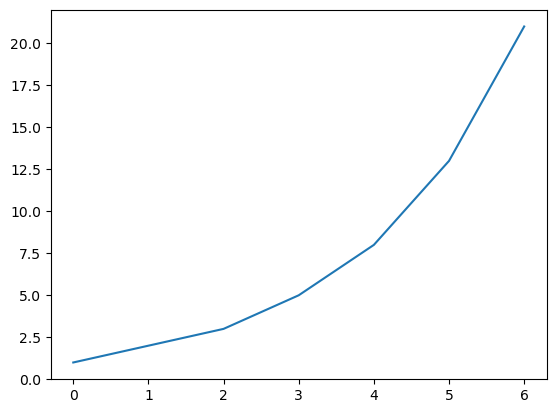

In [10]:
plt.plot(y);
plt.show()

We generated the above plot using just about the simplest code one can imagine: we just called the `plot()` function in matplotlib (technically, in matplotlib's pyplot module, but I'll use the terms interchangeably), and passed it our list of values as the only parameter. We didn't explicitly tell matplotlib *how* to plot the values; we just gave it the list and hoped for the best. As it turns out, if you call `plot()` with a single list of values, matplotlib assumes you want a line plot, and generates a simple plot that connects each consecutive pair of values with a line segment.

Notice that matplotlib interpreted the values we passed in as the y-axis values. If we don't explicitly specify x-axis values, matplotlib assumes that the y-values map serially onto x-values in a one-to-one fashion, such that the first y value corresponds to x=0, the second to x=1, and so on. Of course, often, the data we want to plot isn't sequential like this. What if we had pairs of x-y values? Let's try it out...

In [12]:
x = [1, 6, 3, 9, 4, 16, 2]
# y's copied from above for easier reading
y = [1, 2, 3, 5, 8, 13, 21]

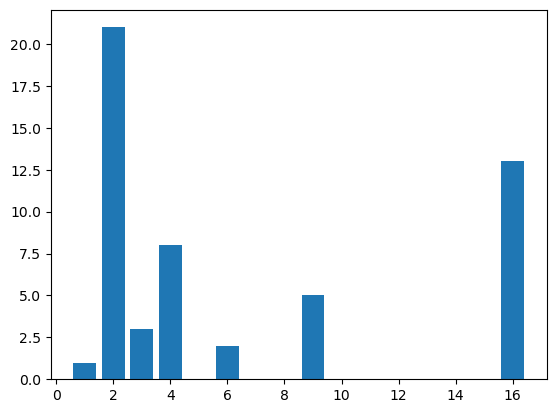

In [13]:
plt.bar(x,y)
plt.show()

Now we have a fairly random-looking set of 2D points. The first point is at coordinates [1, 1]; the second is at [6, 2]; the third at [3, 3]; and so on. What happens if we pass *both* lists of values to `plot()`?

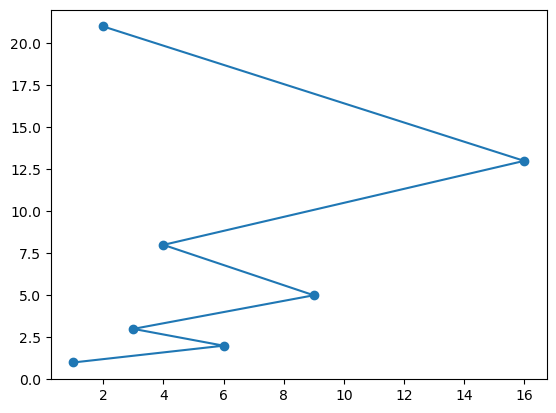

In [15]:
plt.plot(x, y,'-o')
plt.show()

When we explicitly pass in two sets of values, matplotlib interprets the first list as the x coordinates and the second as the y coordinates. It still assumes we want a line plot, so it's still connecting each pair of points with a line segment. This may not be exactly what we expect: in most cases where want to plot non-sequential pairs of values, we probably intend to display the values as a scatter plot rather than a line plot. That is, we don't assume that there's any continuity between data points that justifies connecting them with lines.

How do we tell matplotlib to give us a scatter plot rather than a line plot? We have two basic options. First, we could explicitly call pyplot's `scatter()` function:

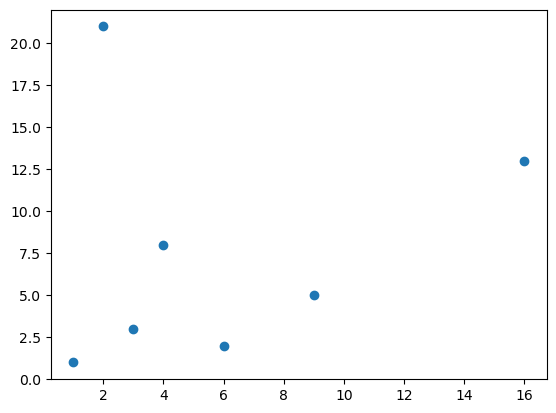

In [17]:
plt.scatter(x, y)
plt.show()

By calling `scatter()` rather than `plot()`, we're explicitly telling matplotlib to display our data points as disconnected points rather than using the default line plot found in `plot()`.

Alternatively, we could have kept using `plot()`, but taken advantage of the many arguments `plot()` supports by explicitly indicating how we want our data points styled:

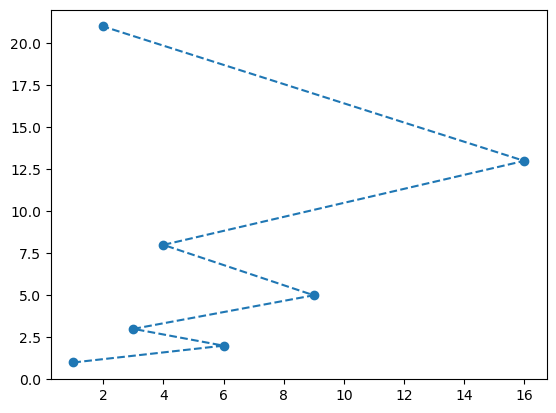

In [19]:
plt.plot(x, y, '--o')
plt.show()

Notice the new positional argument `'o'` we pass to `plot()`. If we consult [the documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) for `plot()`, it turns out that the third optional parameter to `plot()`--named `fmt` (for format)--specifies basic formatting options. `fmt` is actually quite powerful, in that it allows us to control marker and/or line color and style in one shot. For example, let's say we want to show both dashed lines between segments and X's for point markers. And let's say we want to replace the default blue color with red. Here's how we can do that:

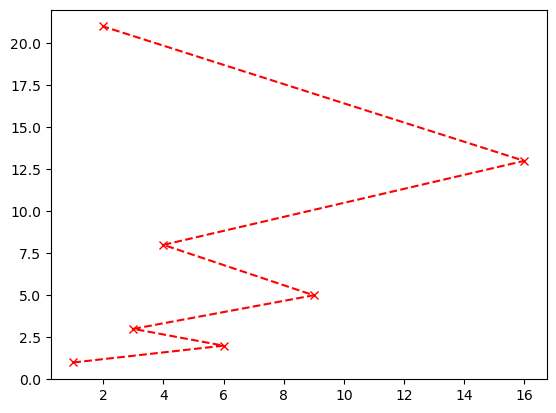

In [21]:
plt.plot(x, y, 'rx--')
plt.show()

You might be thinking that, while the `fmt` argument is pretty powerful, it's also quite terse, and seems pretty hard to learn and remember. Fortunately, you don't *have* to control style with `fmt`; it just provides a convenient shorthand notation. If you prefer to be explicit, you can independently control each of the options that `fmt` allows you to manipulate:

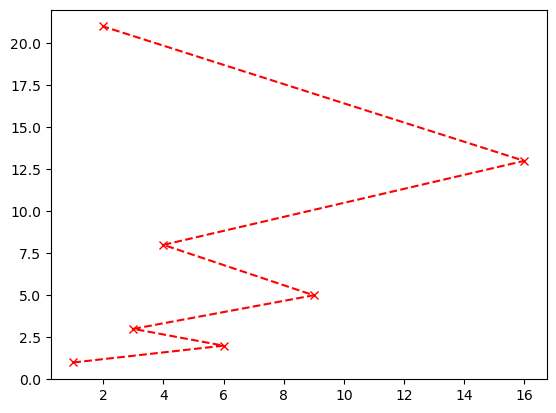

In [23]:
plt.plot(x, y, color='red', marker='x', linestyle='dashed')
plt.show()

### Figure Fontsize

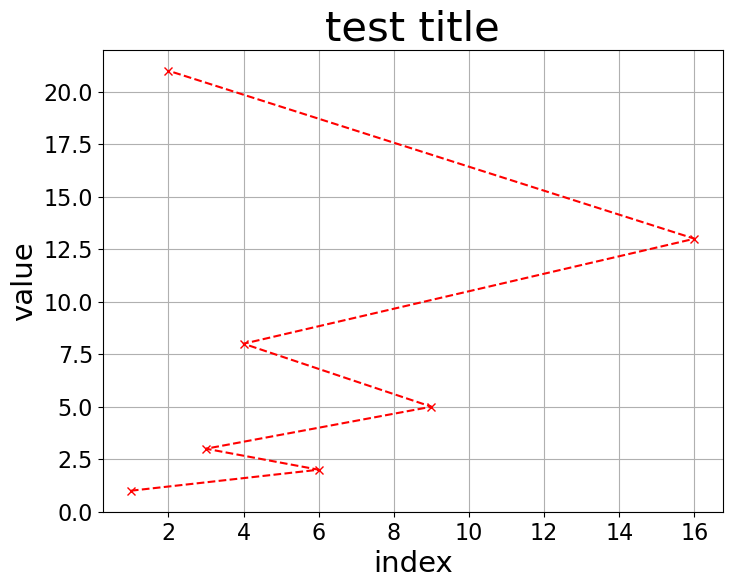

In [25]:
#figure size
plt.figure(figsize=(8,6))
#plot figure
plt.plot(x, y, color='red', marker='x', linestyle='dashed')

#plot title
plt.title('test title', fontsize=30)

#set x label
plt.xlabel('index', fontsize=21)

#set y label
plt.ylabel('value', fontsize=21)

#set y yticks
plt.yticks(fontsize=16)

#set x yticks
plt.xticks(fontsize=16)

plt.grid(True)

plt.show()

The above command produces exactly the same result as the previous one, but is much more explicit.

At this point you might be wondering how many other parameters the `plot()` function accepts. The answer is "a lot". Here's another example illustrating just some of the parameters at your disposal. We'll also take the opportunity to replace our collection of random data points with something a little more orderly.

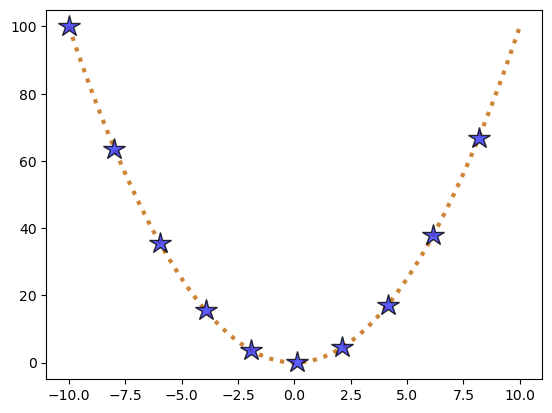

In [27]:
import numpy as np

# y = x^2 in the range of -10 to 10
x = np.linspace(-10, 10, 100)
y = x**2

plt.plot(x, y, color='#c26603', marker='*', markersize=16, markeredgecolor='black',
         markerfacecolor='#3333fc', linewidth=3, linestyle=':', alpha=0.8, markevery=10);
plt.show()


### Bar graph in matplotlib
Bar charts, also called bar graphs, or bar plots are constructed with Matplotlib's pyplot library. To construct a bar chart with Matplotlib, first import Matplotlib. 
To build the bar chart, we create a list of bar heights. The bar heights are the tensile strengths of the three metals. We also need a list of bar positions. Specifying bar positions seems strange, but the plt.bar() method needs to know where along the x-axis to put the bars. The plt.bar() method requires two positional arguments:

plt.bar([list of bar positions], [list of bar heights])

In [29]:
# define bar heights and bar positions
heights = [125, 276, 345]
x_pos = [1, 2, 3]

Next, build the plot by passing in the list of bar position x_pos and list of bar heights heights as positional arguments to the plt.bar() function. These positional arguments must be specified in the proper order.

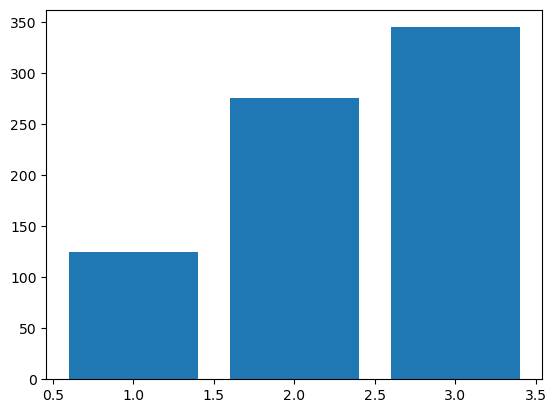

In [31]:
# Build the plot
plt.bar(x_pos,heights)

plt.show()

In [32]:
np.array(x_pos)+0.2, np.array(heights)+50

(array([1.2, 2.2, 3.2]), array([175, 326, 395]))

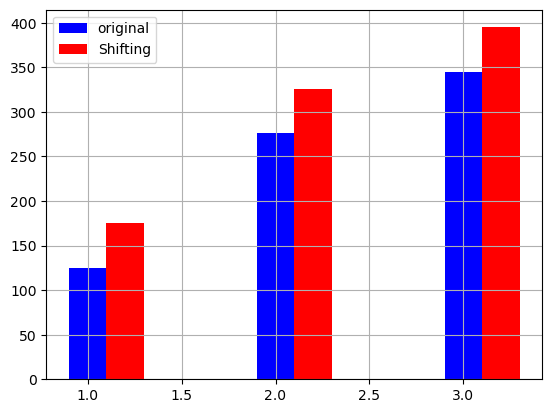

In [33]:
import numpy as np
heights = [125, 276, 345]
x_pos = [1, 2, 3]
plt.bar(x_pos,heights,width=0.2,color='blue',align='center',label='original')
plt.bar(np.array(x_pos)+0.2, np.array(heights)+50,width=0.2,color='red',align='center', label='Shifting')
plt.legend()
plt.grid(True)
plt.show()

### Enhance the visualization icons and include detailed inline comments

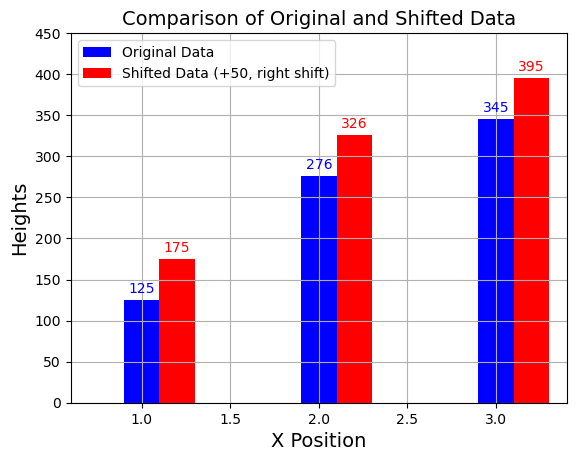

In [35]:
# plt.rcParams["font.family"] = "Times New Roman"
# Plot the original data as blue bars
plt.bar(x_pos, heights, width=0.2, color='blue', align='center', label='Original Data')

# Plot the shifted data as red bars; shifted right by 0.2 and increased by 50 in height
plt.bar(np.array(x_pos) + 0.2, np.array(heights) + 50, width=0.2, color='red', align='center', label='Shifted Data (+50, right shift)')

# Add title and axis labels for better context
plt.title("Comparison of Original and Shifted Data",fontsize=14)
plt.xlabel("X Position", fontsize=14)
plt.ylabel("Heights",fontsize=14)

# Add grid and legend to the plot
plt.grid(True)
plt.legend()
plt.ylim(0,450)
plt.xlim(0.6,3.4)

# Optionally, annotate the bars to explain further details
for x, h in zip(x_pos, heights):
    plt.text(x, h + 5, f"{h}", ha='center', va='bottom', color='blue')

for x, h in zip(np.array(x_pos) + 0.2, np.array(heights) + 50):
    plt.text(x, h + 5, f"{h}", ha='center', va='bottom', color='red')

# Display the plot
plt.show()

### Updated x-axis labels to "Position 1", "Position 2", and "Position 3"

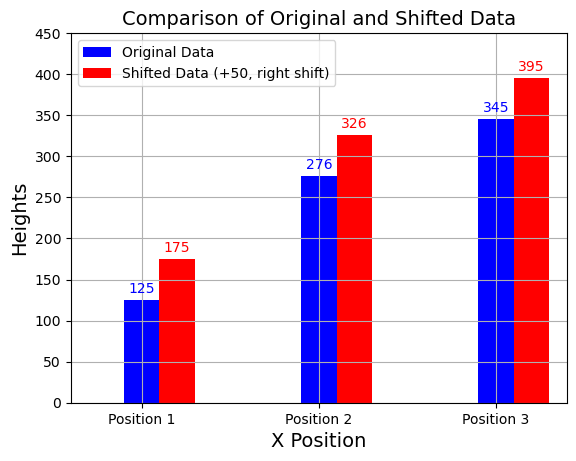

In [37]:
# plt.rcParams["font.family"] = "Times New Roman"
# Plot the original data as blue bars
plt.bar(x_pos, heights, width=0.2, color='blue', align='center', label='Original Data')

# Plot the shifted data as red bars; shifted right by 0.2 and increased by 50 in height
plt.bar(np.array(x_pos) + 0.2, np.array(heights) + 50, width=0.2, color='red', align='center', label='Shifted Data (+50, right shift)')

# Add title and axis labels for better context
plt.title("Comparison of Original and Shifted Data",fontsize=14)
plt.xlabel("X Position", fontsize=14)
plt.ylabel("Heights",fontsize=14)

plt.xticks(ticks=[1, 2, 3], labels=['Position 1', 'Position 2', 'Position 3'])

# Add grid and legend to the plot
plt.grid(True)
plt.legend()
plt.ylim(0,450)
plt.xlim(0.6,3.4)

# Optionally, annotate the bars to explain further details
for x, h in zip(x_pos, heights):
    plt.text(x, h + 5, f"{h}", ha='center', va='bottom', color='blue')

for x, h in zip(np.array(x_pos) + 0.2, np.array(heights) + 50):
    plt.text(x, h + 5, f"{h}", ha='center', va='bottom', color='red')

# Display the plot
plt.show()

### Practice: updated above code with the y-axis limited to integer tick values (100, 200, 300, 400)

Add your name on title.

In [39]:
#Your code:
====

SyntaxError: invalid syntax (576853892.py, line 2)

### Back-to-Back Bar Charts

We can plot two bar charts back to back at the same time using a simple trick. The idea is to have two bar charts, using a simple trick, that is, the length/height of one bar can be negative.


In [ ]:
U1 = np.array([15., 35., 45., 32.])
U2 = np.array([12., 30., 50., 25.])

z1 = np.arange(4)

plt.barh(z1, U1, color = 'r')
plt.barh(z1, -U2, color = 'b')

plt.show()

### Bar in pandas
1. Providing multiple columns in y parameter.

The trick here is to pass all the data that has to be plotted together as a value to ‘y’ parameter of plot function.

In [ ]:
import pandas as pd
# creating dataframe 
df = pd.DataFrame({ 
    'Name': ['John', 'Sammy', 'Joe'], 
    'Age': [45, 38, 90], 
    'Height(in cm)': [150, 180, 160] 
}) 
  
df

In [ ]:
# plotting graph 
df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar") 
plt.show()

2. By plotting on the same axis

Plotting all separate graph on the same axes, differentiated by color can be one alternative. Here again plot() function is employed.

In [ ]:
# creating dataframe 
df = pd.DataFrame({ 
    'Name': ['John', 'Sammy', 'Joe'], 
    'Age': [45, 38, 90], 
    'Height(in cm)': [150, 180, 160] 
}) 
  
# plotting Height 
ax = df.plot(x="Name", y="Height(in cm)", kind="bar") 
# plotting age on the same axis 
df.plot(x="Name", y="Age", kind="bar",ax=ax, color="red") 

plt.show()



### High-level plots in matplotlib
Matplotlib is a very rich package. One of its notable features is that it provides plotting interfaces at both high and low levels. At the high level, matplotlib's pyplot module includes [a large number of functions](https://matplotlib.org/api/pyplot_summary.html) that can construct common types of plots in a single call. We've already seen the `plot()` and `scatter()` functions, which by default produce line plots and scatter plots, respectively. But matplotlib also has things like `bar()`, `contour()`, `hist()`, and `hlines()`, which respectively produce bar plots, contour plots, histograms, and horizontal lines. It also has support for less common plots--some of which are widely used in specific domains of analysis--like `barbs()`, `hexbin()`, `magnitude_spectrum()`, and so on. For example:

In [ ]:
# Set the figure to a fixed size (6 x 6 inches)
plt.figure(figsize=(6, 6))

# Yes, it's a pie chart.
plt.pie([4, 1, 6, 9], labels=["Cherry Pie", "Apple Pie", "Blueberry Pie", "Rhubarb Pie"],
        colors=["red", "green", "blue", "orange"],startangle=45, textprops={'fontsize': 20})
plt.show()

In [ ]:

plt.figure(figsize=(6, 6))

plt.pie([4, 1, 6, 9], explode=[0, 0.2, 0, 0], labels=["Cherry Pie", "Apple Pie", "Blueberry Pie", "Rhubarb Pie"],
        colors=["red", "green", "blue", "orange"], startangle=45, textprops={'fontsize': 20})
plt.show()

And just like that, in a single line of code, we have an elegant-looking pie chart. I mean, sure, it's still a pie chart. But as pie charts go, it's quite lovely.

### Exploded Pie Chart


We can plot an exploded Pie chart with the addition of keyword argument **explode**. It is an array of the same length as that of X. Each of its values specify the radius fraction with which to offset the wedge from the center of the pie.

In [ ]:
plt.figure(figsize=(7,7))

x11 = [30, 25, 20, 15, 10]

labels = ['Computer', 'Electronics', 'Mechanical', 'Chemical', 'Agriculture']

explode = [0.2, 0.1, 0.1, 0.05, 0]

plt.pie(x11, labels=labels, explode=explode, autopct='%1.1f%%');

plt.show()

### Practice: your Pie Chart with given data

You should add **reasonal labels** for your Pie chart. Add your name on title.

x12 = [130, 75, 90, 65, 11]

explode12 = [0.1, 0.3, 0.2, 0.05, 0.04]

In [ ]:
# Your code
====

## Composing multi-plot figures
So far we've only dealt with figures that have a single plot. But it's very common to want to construct more complex figures made up of multiple panels--often in irregular arrangements (e.g., a single left column, and a right column broken up into 3 separate cells). Matplotlib provides a variety of tools for working with multi-plot layouts. Here we'll illustrate a couple of the more accessible ones. In general, we can think of a `Figure` in matplotlib as a container for one or more `Axes` objects, where the position of the `Axes` in relation to the `Figure` is specified when the former is attached to the latter.

Let's first consider the case where we're working with a regular layout--meaning, we want to divide our figure into a fixed number of rows and/or columns. Say we want to generate the same basic plot for multiple discrete groups or bins of data. The easiest way to deal with this kind of situation in matplotlib is using the `subplots()` function. We'll take a look at `subplots()` in a moment; but before we do that, let's start looking at some real data, instead of working with random numbers. We'll use the `load_dataset` utility in a plotting library called `seaborn` to import the famous "iris" dataset:

In [ ]:
# We're not going to talk about seaborn just yet;
# we're just using its data loading utility to retrieve
# the iris dataset.
iris = pd.read_csv('IRIS.csv')

Here's what the Iris dataset looks like:

In [ ]:
iris.head(5)

Now let's look at how we can go about composing a figure made up of many different subplots in matplotlib. We'll capitalize on the fact that the Iris dataset contains observations for 4 different attributes measured in 3 different Iris species to generate a 4 x 3 plot, where each cell shows a histogram of observations.

In [ ]:
# Set up the figure and axes--a 4 x 3 grid.
# We share both the x and y axes so it's easy to compare values.
fig, axes = plt.subplots(4, 3, figsize=(6, 6))


# We'll plot each species of iris in a different column
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# ..and a histogram of each attribute in a separate row
attrs = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for i in range(len(species)):
    sp = species[i]
    sp_data = iris.query('species == @sp')
    # Show column names
    axes[0, i].set_title(sp, fontsize="16")
    for j in range(len(attrs)):
        attr = attrs[j]
        values = sp_data[attr]
        # plot separately on each Axes
        axes[j, i].hist(values)
        
        # Only plot y-axis label for first column
        if i == 0:
            axes[j, i].set_ylabel(attr, fontsize=12)

# A fairly magical layout manager that tends to clean up
# figures well and prevent overlap between elements.
plt.tight_layout()
plt.show()

Notice that, in the above example, most of the code is concerned with manipulating the data and tweaking the plot aesthetics. The code to set up the multi-panel layout is relatively trivial: it takes one line to set up an array of `Axes` objects (using the `subplots()` function, which we politely ask for `4` rows and `3` columns), and after that, we simply loop over elements of the `axes` list and call our plotting functions directly on each `Axes` object.

### Raw Measurements with Line Graph

We try to visualize the raw measurements of four features in the Iris dataset—sepal length, petal length, sepal width, and petal width—using a line graph. Instead of using aggregated (averaged) data, the code plots each individual measurement for all samples, allowing us to observe the detailed variations and trends within the dataset.

In [ ]:
# Extract raw data for four measurements
sepal_length = iris['sepal_length']
petal_length = iris['petal_length']
sepal_width  = iris['sepal_width']
petal_width  = iris['petal_width']

# Create an array for the x-axis representing sample indices
x = np.arange(len(iris))  # e.g., 0, 1, 2, ..., 149 if there are 150 samples

# Create the line graph for raw data
fig = plt.figure(figsize=(10, 6))
plt.plot(x, sepal_length, marker='.', linestyle='-', label='Sepal Length')
plt.plot(x, petal_length, marker='.', linestyle='-', label='Petal Length')
plt.plot(x, sepal_width,  marker='.', linestyle='-', label='Sepal Width')
plt.plot(x, petal_width,  marker='.', linestyle='-', label='Petal Width')

# Label the axes and the plot
plt.xlabel('Sample Index')
plt.ylabel('Measurement (cm)')
plt.title('Raw Measurements from Iris Dataset')
plt.legend()
plt.show()

This plot is still not terribly compelling. For one thing, we're implicitly collapsing over three different species of Iris that may have largely separable distributions. For another, it probably doesn't make sense to plot all four attributes on the same scale, seeing as they measure qualitatively different things (even if they're all nominally measured in centimeters).

To address this, we can take advantage of some of pandas other plotting tools. For example, in addition to the convenient `plot()` method, every pandas `DataFrame` exposes a number of other plotting methods that offer more flexibility. In this case, we'll use the `boxplot()` method, which wraps pyplot's own function of the same name (enabling us to pass any arguments that the pyplot version recognizes).

In [ ]:
# Separate boxplot of iris attributes for each species
iris.boxplot(by='species', figsize=(16, 4), layout=(1, 4));
plt.show()

### Plot with matplotlib

In [ ]:
# Extract the unique species from the dataset
species = iris['species'].unique()
print(species)

# Prepare the data for the "sepal_length" feature: create a list of values for each species
data_to_plot = [iris[iris['species'] == sp]['sepal_length'] for sp in species]

# Create a figure and plot the box plot
plt.figure(figsize=(8, 6))
plt.boxplot(data_to_plot, tick_labels=species)
plt.title("Boxplot of Sepal Length by Species")
plt.xlabel("Species")
plt.ylabel("Sepal Length")
plt.grid()
plt.show()

### Big takeaway 

**Observation:** 
The boxplot of sepal length by species reveals several key insights. Most notably, it highlights that Iris setosa consistently exhibits shorter sepal lengths compared to Iris versicolor and Iris virginica, whose medians are noticeably higher. The relatively narrow interquartile range for setosa suggests a more uniform sepal size within that species, while the wider ranges observed for versicolor and virginica indicate greater variability. Outliers present in the data further hint at individual specimens that deviate from the norm, potentially warranting further investigation.

Overall, this result helps in understanding not only the central tendency of sepal length for each species but also the spread and potential anomalies within the data, which can be important for classification and further analysis.

In [ ]:
# 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', and 'species'
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
species = iris['species'].unique()

# Set up the figure with subplots (one subplot per feature)
plt.figure(figsize=(16, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    # Prepare data: for each species, extract the values for the current feature
    data_to_plot = [iris[iris['species'] == sp][feature] for sp in species]
    
    # Create the box plot for the current feature, using 'tick_labels' for species labels
    plt.boxplot(data_to_plot, tick_labels=species)
    plt.title(f"Boxplot of {feature.replace('_', ' ').title()}")
    plt.xlabel("Species")
    plt.ylabel(feature.replace('_', ' ').title())
    plt.grid()
    # plt.ylim(0,8)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

### Average Measurements with Bar graph

We try to compare two measurements—sepal length and petal length—for each Iris species. 

It groups the data by species, calculates the average for both measurements, and then creates a bar graph. 

In the graph, each species is represented on the x-axis with two bars: one for the average sepal length and one for the average petal length. This visual comparison helps to quickly see how these two features differ across species.

In [ ]:
# Group the data by species and compute average sepal and petal lengths.
# (Adjust the column names based on your CSV file. Common names are used here.)
avg_sepal_length = iris.groupby('species')['sepal_length'].mean()
avg_petal_length = iris.groupby('species')['petal_length'].mean()

# Create x positions for each species.
species = avg_sepal_length.index.tolist()
x = np.arange(len(species))
width = 0.35  # Bar width

# Create the bar graph.
fig = plt.figure(figsize=(8, 6))
plt.bar(x - width/2, avg_sepal_length, width, label='Sepal Length')
plt.bar(x + width/2, avg_petal_length, width, label='Petal Length')

# Label the x-axis with species names.
plt.xticks(x, species)
plt.xlabel('Species')
plt.ylabel('Average Length (cm)')
plt.title('<Yourname>+Average Sepal and Petal Length by Species')
plt.legend()
plt.grid()
plt.show()

### Saving the Plot


We can save the figures in a wide variety of formats. We can save them using the **savefig()** command as follows:-


`fig.savefig(‘fig1.png’)`



We can explore the contents of the file using the IPython **Image** object.



`from IPython.display import Image`


`Image(‘fig1.png’)`


In **savefig()** command, the file format is inferred from the extension of the given filename. Depending on the backend, 
many different file formats are available. The list of supported file types can be found by using the get_supported_filetypes() method of the figure canvas object as follows:-


`fig.canvas.get_supported_filetypes()` 

In [ ]:
# Saving the figure
# fig.savefig('<Your Name + title>.png')